In [55]:
# Importanweisungen

import numpy as num
import scipy as sci
import sympy as sym
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.axes as axes
import math
from scipy import optimize
import uncertainties as uc
import uncertainties.unumpy as unp 
unv=unp.nominal_values
usd=unp.std_devs

In [56]:
# Konstanten fuer einheitliche Darstellung

fig_size = (10, 6)
fig_legendsize = 14
fig_labelsize = 12

In [57]:
# allgemeine Fitfunktionen

def linear(x,m): # lineare Funktion mit f(x) = m * x 
    return(m*x)

def gerade(x, m, b): # gerade mit = f(x) = m * x + b
    return (m*x + b)

# fittet ein dataset mit gegebenen x und y werten, eine funktion und ggf. anfangswerten und y-Fehler
# gibt die passenden parameter der funktion, sowie dessen unsicherheiten zurueck
#
# https://stackoverflow.com/questions/14581358/getting-standard-errors-on-fitted-parameters-using-the-optimize-leastsq-method-i#
# Updated on 4/6/2016
# User: https://stackoverflow.com/users/1476240/pedro-m-duarte
def fit_curvefit(datax, datay, function, p0=None, yerr=None, **kwargs):

    pfit, pcov = \
         optimize.curve_fit(function,datax,datay,p0=p0,\
                            sigma=yerr, epsfcn=0.0001, **kwargs)
    error = [] 
    for i in range(len(pfit)):
        try:
          error.append(num.absolute(pcov[i][i])**0.5)
        except:
          error.append( 0.00 )
    pfit_curvefit = pfit
    perr_curvefit = num.array(error)
    return pfit_curvefit, perr_curvefit 

# usage zB:
# pfit, perr = fit_curvefit(unv(xdata), unv(ydata), gerade, yerr = usd(ydata), p0 = [1, 0])
# fuer eine gerade mit anfangswerten m = 1, b = 0

In [58]:
# gibt Daten fuer LaTeX bereitgestellt aus

def latex_printValue(val, file):
    f = open('data/%s.txt' % file, 'w')
    f.write(str(val).replace('/', ''))

In [71]:
# import der messwerte

unc_I = 0.01/num.sqrt(6) # analog
unc_U = 0.01/num.sqrt(6)
unc_UE = 0.05/num.sqrt(6) # ungenauer, weil ungefähr abgelesen

T_Ofen = uc.ufloat(192, 5/num.sqrt(3)) + 273.15 # Digitalthermometer T in K
T_Raum = uc.ufloat(18, 5/num.sqrt(6)) + 273.15 # Raumtemeratur etwa 18gC

data = num.loadtxt("messung/Ne.txt", comments = "#", delimiter = "\t", unpack=False)
U_Ne = unp.uarray(data[:,0], unc_U) * 10 # erste spalte Spannung U mit unc_U
I_Ne = unp.uarray(data[:,1], unc_I) # zweite spalte Stromstärke mit unc_I

data = num.loadtxt("messung/Hg_kalt.txt", comments = "#", delimiter = "\t", unpack=False)
U_HgK = unp.uarray(data[:,0], unc_U) * 10 # erste spalte Spannung U mit unc_U
I_HgK = unp.uarray(data[:,1], unc_I) # zweite spalte Stromstärke mit unc_I

data = num.loadtxt("messung/Hg_warm.txt", comments = "#", delimiter = "\t", unpack=False)
U_HgW = unp.uarray(data[:,0], unc_U) * 10 # erste spalte Spannung U mit unc_U
I_HgW = unp.uarray(data[:,1], data[:,2]) # zweite spalte Stromstärke mit eigenen Unsicherheiten

data = num.loadtxt("messung/MaxMin.txt", comments = "#", delimiter = "\t", unpack=False)
U_NeMax = unp.uarray(data[0,0:3], unc_UE)*10 # erste Zeile Maxima Spannungen Neon
U_NeMin = unp.uarray(data[1,0:3], unc_UE)*10 # erste Zeile Minima Spannungen Neon
U_HgMax = unp.uarray(data[2], unc_UE)*10 # erste Zeile Maxima Spannungen Quecksilber
U_HgMin = unp.uarray(data[3], unc_UE)*10 # erste Zeile Minima Spannungen Quecksilber

(array([25.299999999999997+/-0.2041241452319315, 45.8+/-0.2041241452319315,
        64.2+/-0.2041241452319315], dtype=object),
 array([20.7+/-0.2041241452319315, 38.0+/-0.2041241452319315,
        58.7+/-0.2041241452319315], dtype=object))

In [60]:
# weitere Werte
# Werte von https://physics.nist.gov/cuu/Constants/index.html[0]
# Werte zu Hg von http://www.periodensystem.info/elemente/quecksilber [1]
# Referenzpunkt http://gestis.itrust.de/nxt/gateway.dll/gestis_de/008490.xml?f=templates$fn=default.htm$3.0 [2]
# Mercury boiling point: http://www.physics.rutgers.edu/%7Eeandrei/389/NISTIR.6643.pdf [3]

c = 299792458 # m/s
k_B = uc.ufloat_fromstr("1.38064852(79)e-23") # J K-1 [0]
h = uc.ufloat_fromstr("4.135667662(25)e-15") # eV s [0]
r_e = uc.ufloat_fromstr("2.8179403227(19)e-15") # m [0]
R = uc.ufloat_fromstr("8.3144598(48)") # J mol-1 K-1 [0]
dH = uc.ufloat(59.3,0.1/num.sqrt(3)) * 1000 # molare Verdampfungsenthalpie, spezifische Verdampfungswaerme J*mol-1 [2]
p0 = 101.325 * 1000
p0 = uc.ufloat(p0, p0 * 0.01) # Druck bei T0 in Pa [3]
T0 = 629.77
T0 = uc.ufloat(T0, T0 * 0.01) # Temperatur Siedepunkt in K [3]

sigma = math.pi * r_e**2

In [70]:
# Rechnung

# Energie
E_NeMin = (U_NeMin[len(U_NeMin)-1] - U_NeMin[0]) / (len(U_NeMin)-1) # Anregungsenergie E in eV = e * U
E_NeMax = (U_NeMax[len(U_NeMax)-1] - U_NeMax[0]) / (len(U_NeMax)-1)
E_Ne = num.median([E_NeMin, E_NeMax])
E_HgMin = (U_HgMin[len(U_HgMin)-1] - U_HgMin[0]) / (len(U_HgMin)-1)
E_HgMax = (U_HgMax[len(U_HgMax)-1] - U_HgMax[0]) / (len(U_HgMax)-1)
E_Hg = num.median([E_HgMin, E_HgMax])

l_Hg = c * h / E_Hg # Wellenlänge des abgestrahlten Photons in m
l_Ne = c * h / E_Ne

f_Hg = E_Hg / h # Frequenz in Hz
f_Ne = E_Ne / h

p_Raum = unp.exp(dH/R * (1/T0 - 1/T_Raum)) * p0 # Druck in Pa
p_Ofen = unp.exp(dH/R * (1/T0 - 1/T_Ofen)) * p0

weg_Hg_Raum = k_B * T_Raum / sigma / p_Raum # mtl freie Weglaenge in m
weg_Hg_Ofen = k_B * T_Ofen / sigma / p_Ofen


latex_printValue(E_Hg, "val_E_Hg_eV")
latex_printValue(E_Ne, "val_E_Ne_eV")
latex_printValue(l_Hg * 1e9, "val_l_Hg_nm")
latex_printValue(l_Ne * 1e9, "val_l_Ne_nm")
latex_printValue(f_Hg * 1e-12, "val_f_Hg_THz")
latex_printValue(f_Ne * 1e-12, "val_f_Ne_THz")
latex_printValue(p_Raum, "val_p_Hg_Raumtemp_Pa")
latex_printValue(p_Ofen, "val_p_Hg_Ofentemp_Pa")
latex_printValue(p_Raum * 1e-5, "val_p_Hg_Raumtemp_bar")
latex_printValue(p_Ofen * 1e-5, "val_p_Hg_Ofentemp_bar")
latex_printValue(weg_Hg_Raum, "val_weg_Hg_Raumtemp_m")
latex_printValue(weg_Hg_Ofen, "val_weg_Hg_Ofentemp_m")

19.225+/-0.10206207261596575

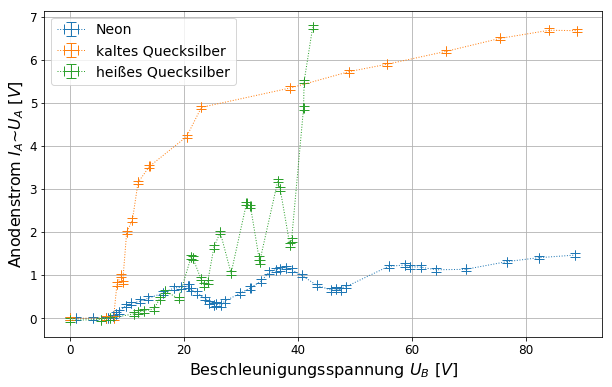

In [62]:
# diagramm 1: I_A / U_A zusammen

fig=plt.figure(figsize=fig_size)

# kein Fit!
# p0 = None # startwerte, wenn unsicher: p0 = None
# pfit, perr = fit_curvefit(unv(sqrth), unv(a), gerade, yerr = usd(a))
# p = unp.uarray(pfit, perr)

plt.errorbar(unv(U_Ne),unv(I_Ne),usd(U_Ne),usd(I_Ne),fmt=':', capsize=5, linewidth=1, label='Neon')
plt.errorbar(unv(U_HgK),unv(I_HgK),usd(U_HgK),usd(I_HgK),fmt=':', capsize=5, linewidth=1, label='kaltes Quecksilber')
plt.errorbar(unv(U_HgW),unv(I_HgW),usd(U_HgW),usd(I_HgW),fmt=':', capsize=5, linewidth=1, label='heißes Quecksilber')

#plt.xlim(0,1200)
plt.legend(prop={'size':fig_legendsize})
plt.grid()
plt.tick_params(labelsize=fig_labelsize)
plt.xlabel("Beschleunigungsspannung $U_B$ [$V$]", {'fontsize':fig_legendsize+2})
plt.ylabel("Anodenstrom $I_A$~$U_A$ [$V$]", {'fontsize': fig_legendsize+2})
plt.savefig("data/CharakteristikZusammen.pdf")
plt.show()

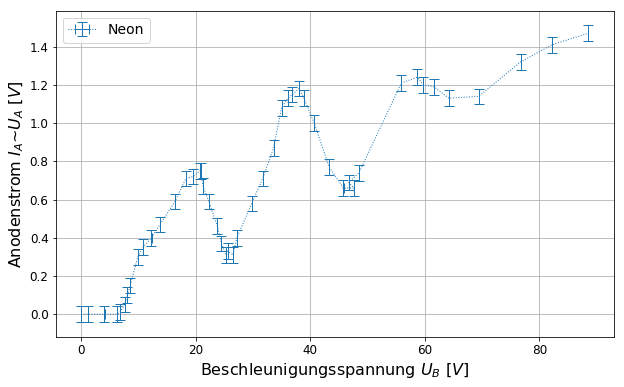

In [63]:
# diagramm 2: I_A / U_A neon

fig=plt.figure(figsize=fig_size)

plt.errorbar(unv(U_Ne),unv(I_Ne),usd(U_Ne),usd(I_Ne),fmt=':', capsize=5, linewidth=1, label='Neon')

#plt.xlim(0,1200)
plt.legend(prop={'size':fig_legendsize})
plt.grid()
plt.tick_params(labelsize=fig_labelsize)
plt.xlabel("Beschleunigungsspannung $U_B$ [$V$]", {'fontsize':fig_legendsize+2})
plt.ylabel("Anodenstrom $I_A$~$U_A$ [$V$]", {'fontsize': fig_legendsize+2})
plt.savefig("data/CharakteristikNe.pdf")
plt.show()

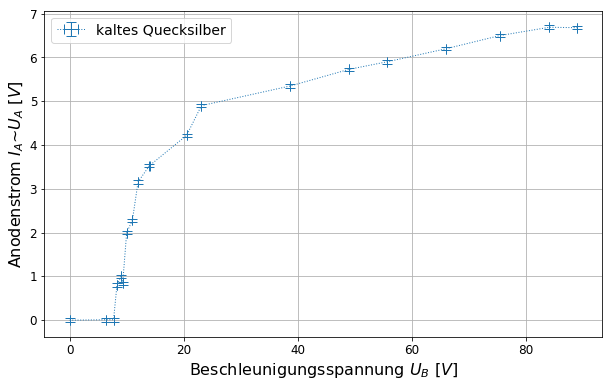

In [64]:
# diagramm 3: I_A / U_A Quecksilber kalt

fig=plt.figure(figsize=fig_size)

plt.errorbar(unv(U_HgK),unv(I_HgK),usd(U_HgK),usd(I_HgK),fmt=':', capsize=5, linewidth=1, label='kaltes Quecksilber')

#plt.xlim(0,1200)
plt.legend(prop={'size':fig_legendsize})
plt.grid()
plt.tick_params(labelsize=fig_labelsize)
plt.xlabel("Beschleunigungsspannung $U_B$ [$V$]", {'fontsize':fig_legendsize+2})
plt.ylabel("Anodenstrom $I_A$~$U_A$ [$V$]", {'fontsize': fig_legendsize+2})
plt.savefig("data/CharakteristikHgKalt.pdf")
plt.show()

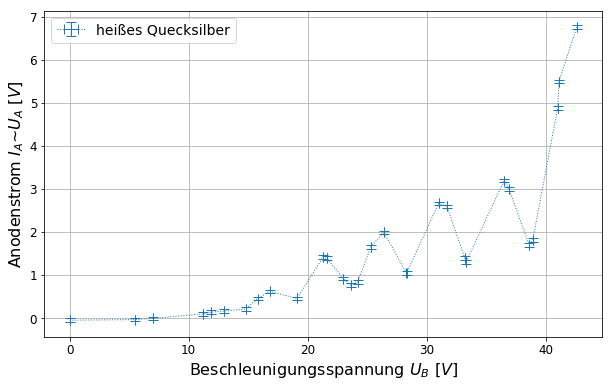

In [67]:
# diagramm 4: I_A / U_A Quecksilber Warm

fig=plt.figure(figsize=fig_size)

plt.errorbar(unv(U_HgW),unv(I_HgW),usd(U_HgW),usd(I_HgW),fmt=':', capsize=5, linewidth=1, label='heißes Quecksilber')

#plt.xlim(0,1200)
plt.legend(prop={'size':fig_legendsize})
plt.grid()
plt.tick_params(labelsize=fig_labelsize)
plt.xlabel("Beschleunigungsspannung $U_B$ [$V$]", {'fontsize':fig_legendsize+2})
plt.ylabel("Anodenstrom $I_A$~$U_A$ [$V$]", {'fontsize': fig_legendsize+2})
plt.savefig("data/CharakteristikHgWarm.pdf")
plt.show()